# Frame the problem

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Obtain data

In [1]:
import pandas as pd
import missingno as ms
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier 

In [3]:
data = pd.read_csv("train.csv")

## Analyze Data

In [4]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


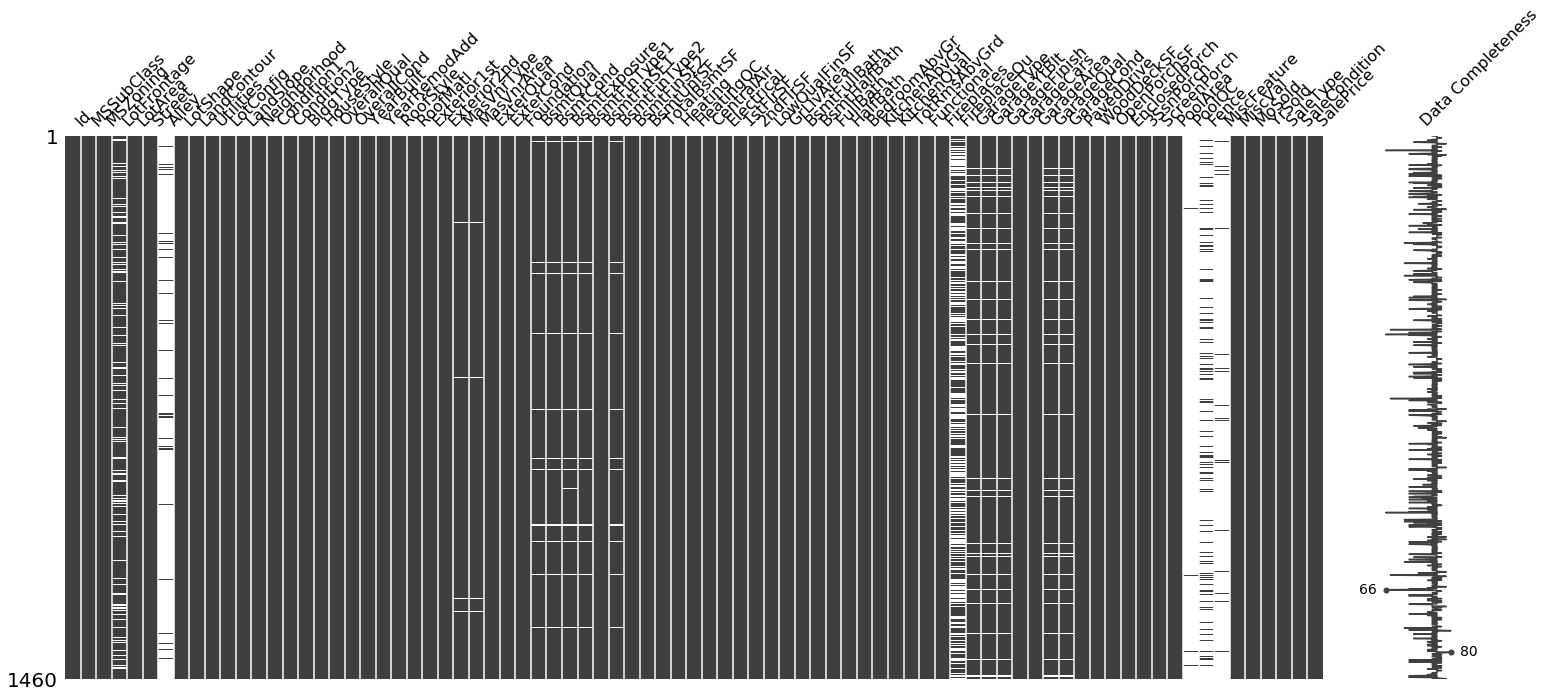

In [7]:
ms.matrix(data ,labels=True)

In [8]:
corr_mat = data.corr()

In [9]:
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


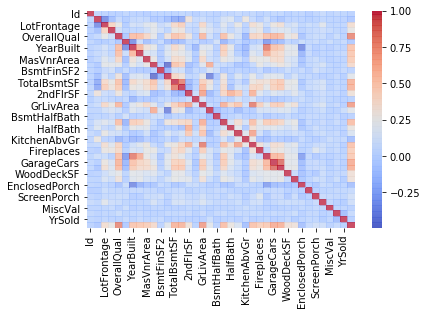

In [10]:
sns.heatmap(corr_mat,cmap="coolwarm",alpha=0.7)

## Feature Engineering

### Dropping columns with more missing values

In [11]:
data.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

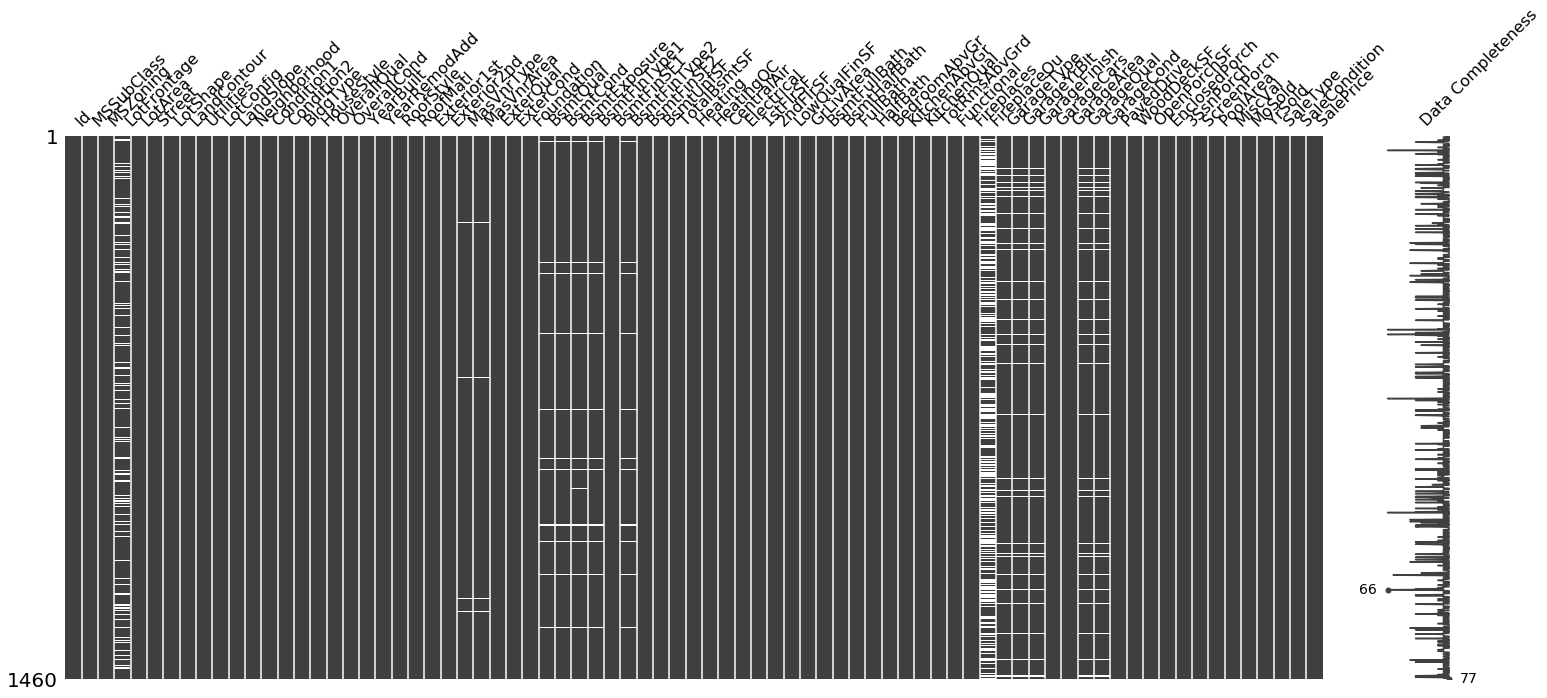

In [12]:
ms.matrix(data,labels=True)

In [13]:
corr_mat = data.corr()
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


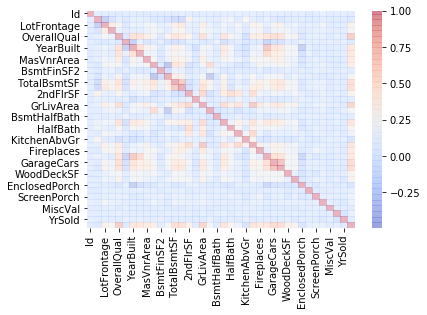

In [14]:
sns.heatmap(corr_mat,cmap="coolwarm",alpha=0.3)

As PoolArea has more number of missing values and less number of variations in values present we make them 0 or 1

In [15]:
data['Pool'] = data['PoolArea'].apply(lambda x: 1 if x>0 else 0)

In [16]:
data.drop('PoolArea',axis=1,inplace=True)

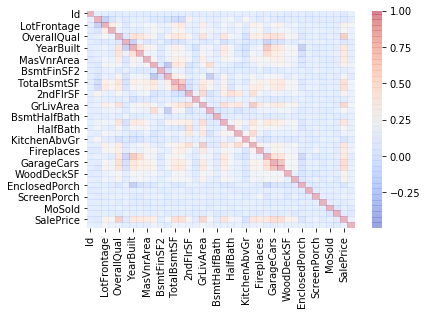

In [17]:
corr_mat = data.corr()
sns.heatmap(corr_mat,cmap="coolwarm",alpha=0.3)


In [18]:
objs ="""MSZoning         1460 non-null object

Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object

RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object

ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     1423 non-null object

BsmtFinType2     1422 non-null object

Heating          1460 non-null object
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
Electrical       1459 non-null object

KitchenQual      1460 non-null object

Functional       1460 non-null object

FireplaceQu      770 non-null object
GarageType       1379 non-null object

GarageFinish     1379 non-null object

GarageQual       1379 non-null object
GarageCond       1379 non-null object
PavedDrive       1460 non-null object


SaleType         1460 non-null object
SaleCondition    1460 non-null object"""

objs = objs.split()
print(objs)

['MSZoning', '1460', 'non-null', 'object', 'Street', '1460', 'non-null', 'object', 'LotShape', '1460', 'non-null', 'object', 'LandContour', '1460', 'non-null', 'object', 'Utilities', '1460', 'non-null', 'object', 'LotConfig', '1460', 'non-null', 'object', 'LandSlope', '1460', 'non-null', 'object', 'Neighborhood', '1460', 'non-null', 'object', 'Condition1', '1460', 'non-null', 'object', 'Condition2', '1460', 'non-null', 'object', 'BldgType', '1460', 'non-null', 'object', 'HouseStyle', '1460', 'non-null', 'object', 'RoofStyle', '1460', 'non-null', 'object', 'RoofMatl', '1460', 'non-null', 'object', 'Exterior1st', '1460', 'non-null', 'object', 'Exterior2nd', '1460', 'non-null', 'object', 'MasVnrType', '1452', 'non-null', 'object', 'ExterQual', '1460', 'non-null', 'object', 'ExterCond', '1460', 'non-null', 'object', 'Foundation', '1460', 'non-null', 'object', 'BsmtQual', '1423', 'non-null', 'object', 'BsmtCond', '1423', 'non-null', 'object', 'BsmtExposure', '1422', 'non-null', 'object', 'B

In [19]:
objs = [objs[i] for i in range(0,len(objs),4) ]

In [20]:
objs

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [21]:
len(objs)

39

In [22]:
def val_unq(lis):
    for i in (lis):
        print("{0} is ValueCount for {1} \n".format(data[i].value_counts(),i))

In [23]:
val_unq(objs)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 is ValueCount for MSZoning 

Pave    1454
Grvl       6
Name: Street, dtype: int64 is ValueCount for Street 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 is ValueCount for LotShape 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 is ValueCount for LandContour 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 is ValueCount for Utilities 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 is ValueCount for LotConfig 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 is ValueCount for LandSlope 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Cl

In [24]:
data['MasVnrType'].fillna("None",inplace=True)
data["BsmtFinType2"].fillna("Unf",inplace=True)
data["Electrical"].fillna("SBrkr",inplace=True)
data.drop("FireplaceQu",inplace=True,axis=1)

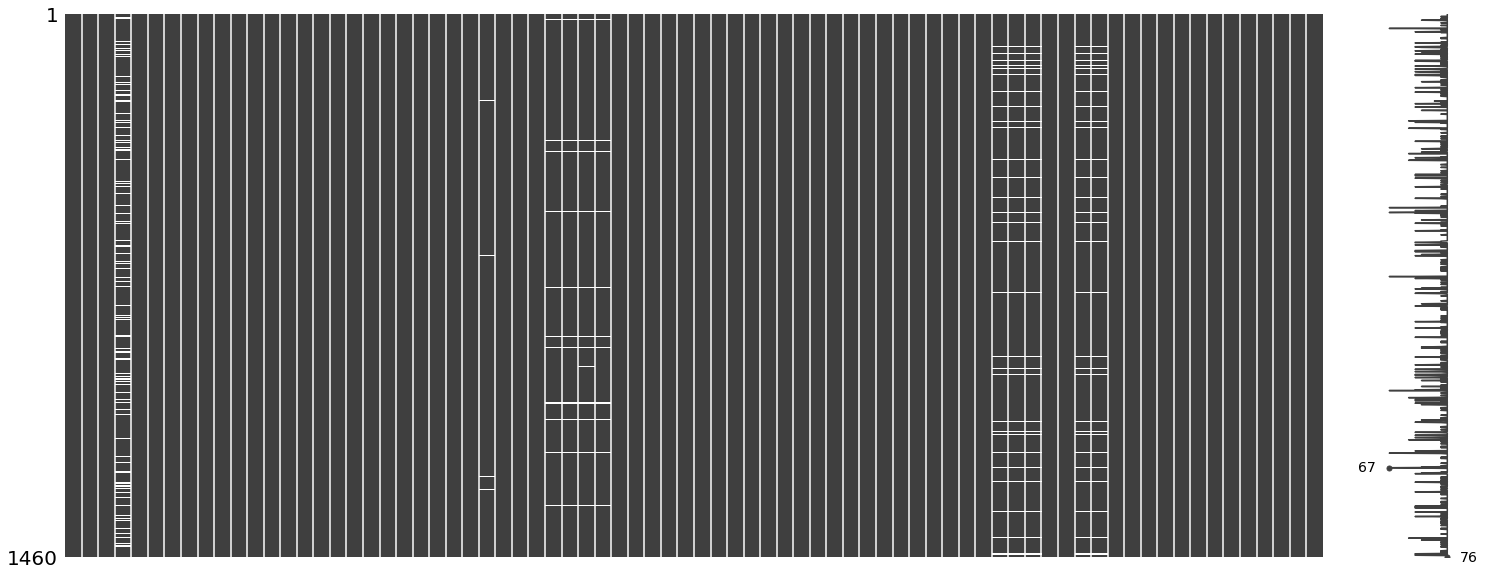

In [25]:
ms.matrix(data)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [27]:
objs.remove('FireplaceQu')
val_unq(objs)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 is ValueCount for MSZoning 

Pave    1454
Grvl       6
Name: Street, dtype: int64 is ValueCount for Street 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 is ValueCount for LotShape 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 is ValueCount for LandContour 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 is ValueCount for Utilities 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 is ValueCount for LotConfig 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 is ValueCount for LandSlope 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Cl

In [28]:
data["BsmtQual"].fillna("TA",inplace=True)
data["BsmtCond"].fillna("TA",inplace=True)
data["BsmtExposure"].fillna("No",inplace=True)
data["BsmtFinType1"].fillna("SBrkr",inplace=True)

data['GarageType'].fillna("Attchd",inplace=True)
data['GarageFinish'].fillna("Unf",inplace=True)
data['GarageQual'].fillna("TA",inplace=True)
data['GarageCond'].fillna("TA",inplace=True)


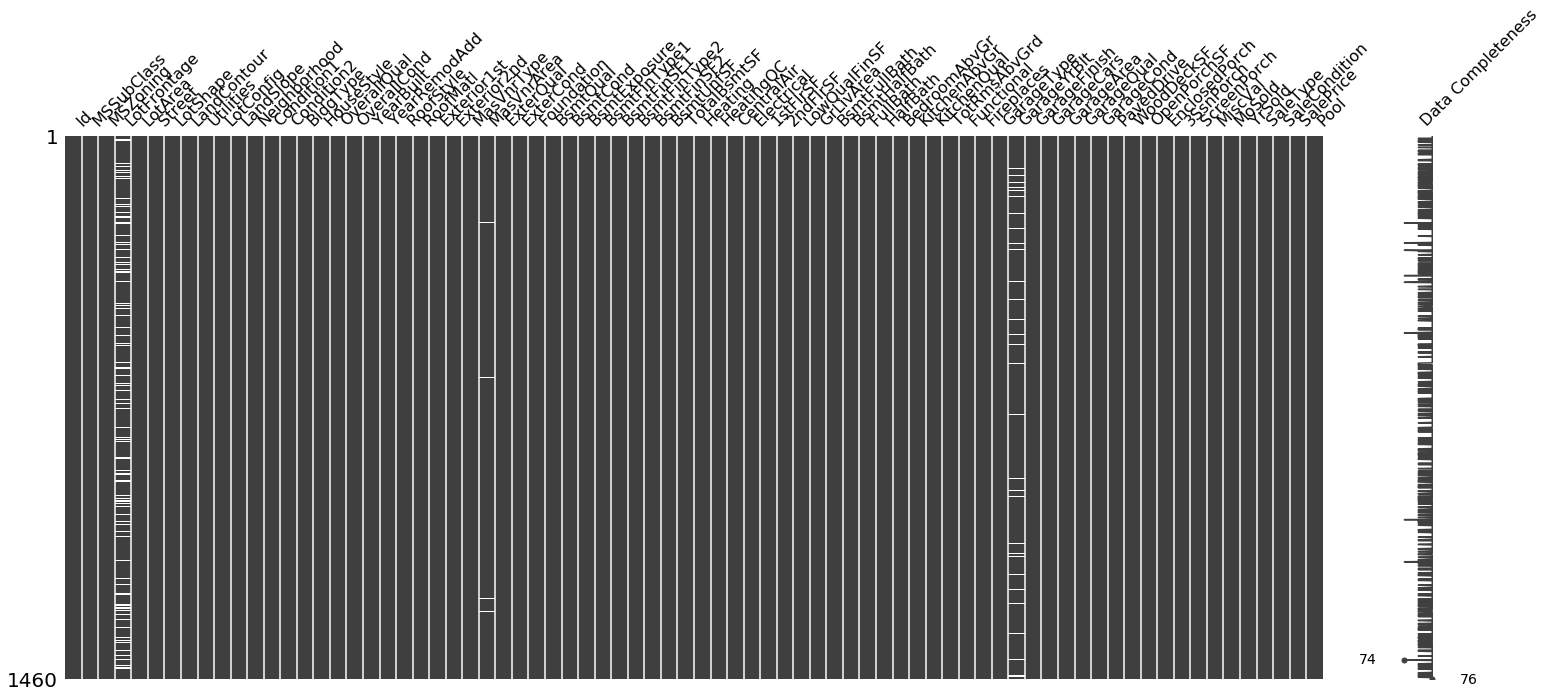

In [29]:
ms.matrix(data,labels=True)

In [30]:
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(),inplace=True)

In [31]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [32]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(),inplace=True)

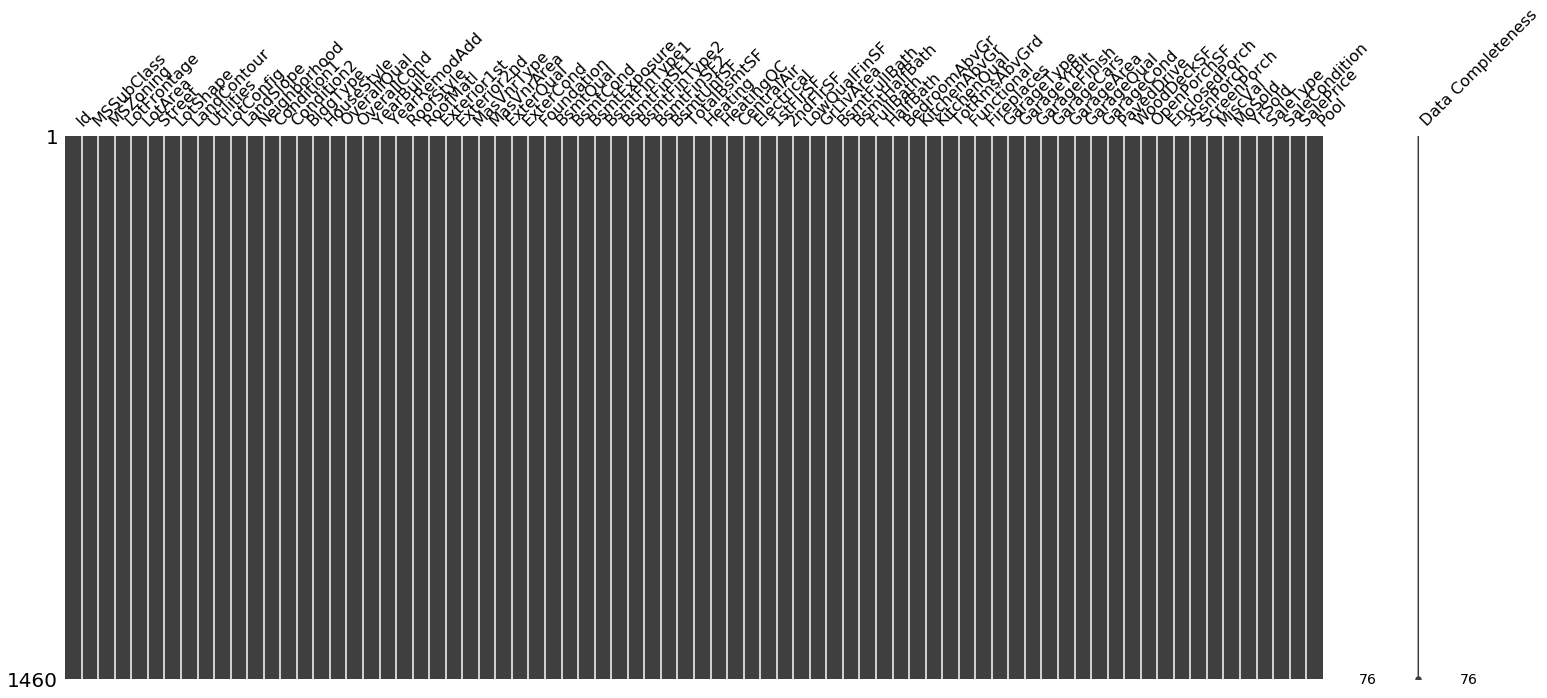

In [33]:
ms.matrix(data,labels=True)

In [34]:
val_unq(objs)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 is ValueCount for MSZoning 

Pave    1454
Grvl       6
Name: Street, dtype: int64 is ValueCount for Street 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 is ValueCount for LotShape 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 is ValueCount for LandContour 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 is ValueCount for Utilities 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 is ValueCount for LotConfig 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 is ValueCount for LandSlope 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Cl

In [35]:
ob = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope','Neighborhood' ,'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [36]:
#no much variations in data
data.drop(['Utilities','RoofMatl','Heating'],axis=1,inplace=True)

In [37]:
data.drop(['Street','Condition2'],axis=1,inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null object
ExterCond        1460 no

In [39]:
def oneHotEnc(col,data):
    dummies = pd.get_dummies(data[col],drop_first=True,prefix=col)
    data.drop([col],inplace=True,axis=1)
    return pd.concat([data,dummies],axis=1)

In [40]:
for i in ob:
    data = oneHotEnc(i,data)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 214 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(176)
memory usage: 684.5 KB


In [42]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
print(list(data.columns))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Pool', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTR

 ## Splitting Data

In [44]:
v = list(data.columns)
v.remove('SalePrice')
X = data[v]
y = data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

## Model Selection
### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

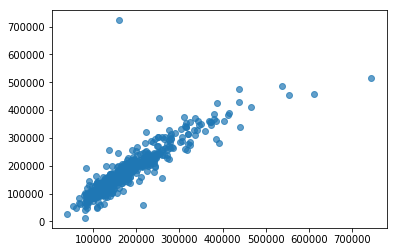

In [46]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions, alpha=0.7,)

## Metrics

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20096.74043189193
MSE: 1390708415.0893028
RMSE: 37292.203140727725


## RandomForestRegressor model

In [48]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
predict=model.predict(X_test)

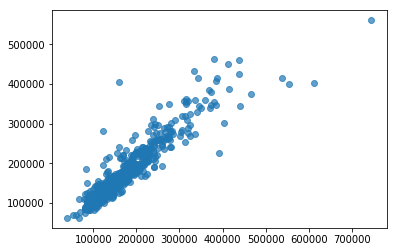

In [49]:
plt.scatter(y_test,predict, alpha=0.7,)

## Metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 18603.425
MSE: 961423292.9647944
RMSE: 31006.826554241154


## Getting and analysing test data

In [51]:
t_data = pd.read_csv('test.csv')

In [52]:
t_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


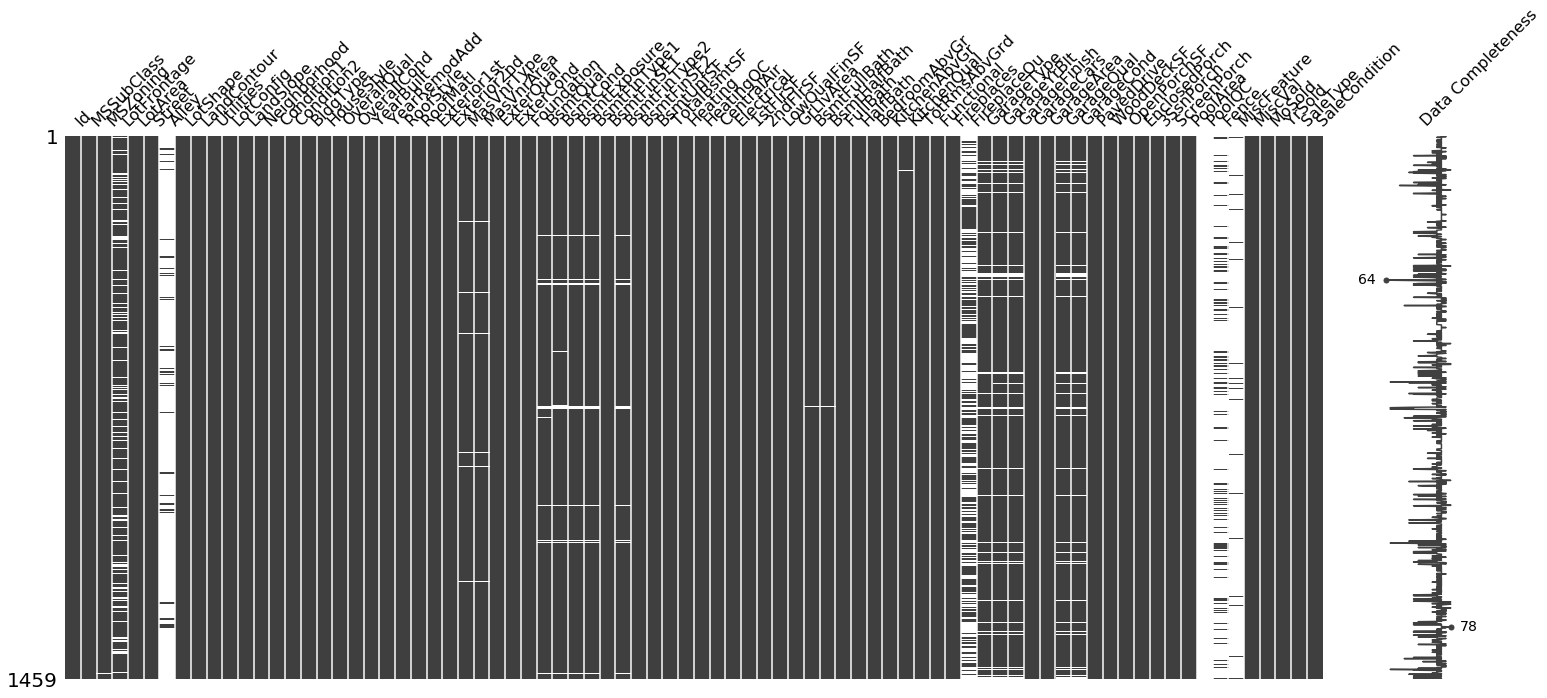

In [53]:
ms.matrix(t_data,labels=True)

In [54]:
t_data['PoolArea'].value_counts()

0      1453
800       1
561       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

In [55]:
t_data.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1, inplace=True)
t_data['Pool'] = t_data['PoolArea'].apply(lambda x: 1 if x>0 else 0)
t_data.drop('PoolArea',axis=1,inplace=True)

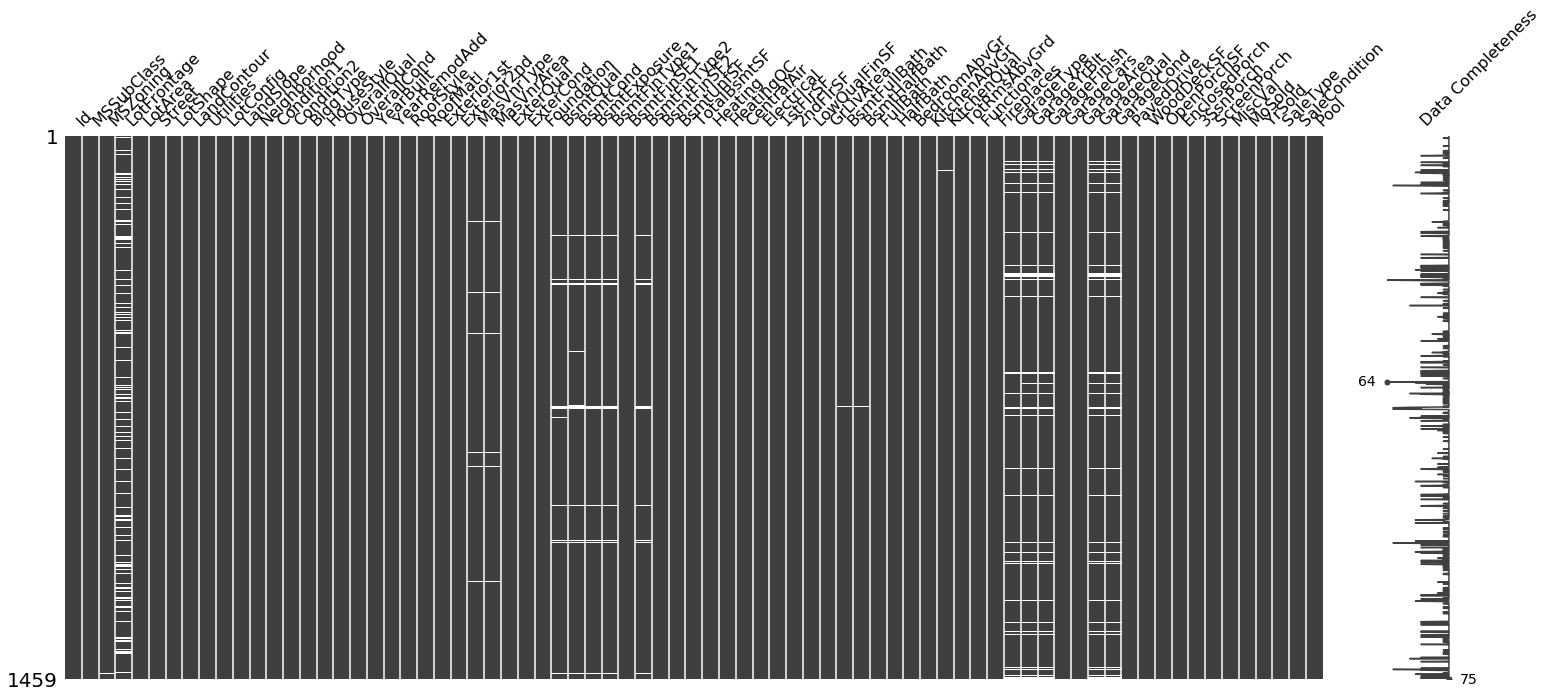

In [56]:
ms.matrix(t_data,labels=True)

In [57]:
t_data['MasVnrType'].fillna("None",inplace=True)
t_data["BsmtFinType2"].fillna("Unf",inplace=True)
t_data["Electrical"].fillna("SBrkr",inplace=True)

t_data["BsmtQual"].fillna("TA",inplace=True)
t_data["BsmtCond"].fillna("TA",inplace=True)
t_data["BsmtExposure"].fillna("No",inplace=True)
t_data["BsmtFinType1"].fillna("SBrkr",inplace=True)

t_data['GarageType'].fillna("Attchd",inplace=True)
t_data['GarageFinish'].fillna("Unf",inplace=True)
t_data['GarageQual'].fillna("TA",inplace=True)
t_data['GarageCond'].fillna("TA",inplace=True)

t_data['MasVnrArea'].fillna(data['MasVnrArea'].mean(),inplace=True)

t_data['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)
t_data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(),inplace=True)

In [58]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non

In [59]:
y = '''
MSZoning         1455 non-null object
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non-null object
BsmtCond         1459 non-null object
BsmtExposure     1459 non-null object
BsmtFinType1     1459 non-null object
BsmtFinType2     1459 non-null object
Heating          1459 non-null object
HeatingQC        1459 non-null object
CentralAir       1459 non-null object
Electrical       1459 non-null object
KitchenQual      1458 non-null object
Functional       1457 non-null object
GarageType       1459 non-null object
GarageFinish     1459 non-null object
GarageQual       1459 non-null object
GarageCond       1459 non-null object
PavedDrive       1459 non-null object
SaleType         1458 non-null object
SaleCondition    1459 non-null object'''


y = y.split()
print(y)

['MSZoning', '1455', 'non-null', 'object', 'Street', '1459', 'non-null', 'object', 'LotShape', '1459', 'non-null', 'object', 'LandContour', '1459', 'non-null', 'object', 'Utilities', '1457', 'non-null', 'object', 'LotConfig', '1459', 'non-null', 'object', 'LandSlope', '1459', 'non-null', 'object', 'Neighborhood', '1459', 'non-null', 'object', 'Condition1', '1459', 'non-null', 'object', 'Condition2', '1459', 'non-null', 'object', 'BldgType', '1459', 'non-null', 'object', 'HouseStyle', '1459', 'non-null', 'object', 'RoofStyle', '1459', 'non-null', 'object', 'RoofMatl', '1459', 'non-null', 'object', 'Exterior1st', '1458', 'non-null', 'object', 'Exterior2nd', '1458', 'non-null', 'object', 'MasVnrType', '1459', 'non-null', 'object', 'ExterQual', '1459', 'non-null', 'object', 'ExterCond', '1459', 'non-null', 'object', 'Foundation', '1459', 'non-null', 'object', 'BsmtQual', '1459', 'non-null', 'object', 'BsmtCond', '1459', 'non-null', 'object', 'BsmtExposure', '1459', 'non-null', 'object', 'B

In [60]:
y = [y[i] for i in range(0,len(y),4) ]
print(y)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [61]:

for i in (y):
    print("{0} is ValueCount for {1} \n".format(t_data[i].value_counts(),i))

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64 is ValueCount for MSZoning 

Pave    1453
Grvl       6
Name: Street, dtype: int64 is ValueCount for Street 

Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64 is ValueCount for LotShape 

Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64 is ValueCount for LandContour 

AllPub    1457
Name: Utilities, dtype: int64 is ValueCount for Utilities 

Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64 is ValueCount for LotConfig 

Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64 is ValueCount for LandSlope 

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SW

In [62]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non

In [63]:
t_data['MSZoning'].fillna('RL',inplace=True)
t_data['Exterior1st'].fillna('VinylSd',inplace=True)
t_data['Exterior2nd'].fillna('VinylSd',inplace=True)

t_data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean(),inplace=True)
t_data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean(),inplace=True)
t_data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean(),inplace=True)
t_data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean(),inplace=True)
t_data['BsmtFullBath'].fillna(data['BsmtFullBath'].mean(),inplace=True)
t_data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean(),inplace=True)

t_data['KitchenQual'].fillna('TA',inplace=True)
t_data['Functional'].fillna('Typ',inplace=True)

t_data['GarageCars'].fillna(data['GarageCars'].mean(),inplace=True)
t_data['GarageArea'].fillna(data['GarageArea'].mean(),inplace=True)

t_data['SaleType'].fillna('WD',inplace=True)

In [64]:
t_data.drop(['Utilities','RoofMatl','Heating'],axis=1,inplace=True)

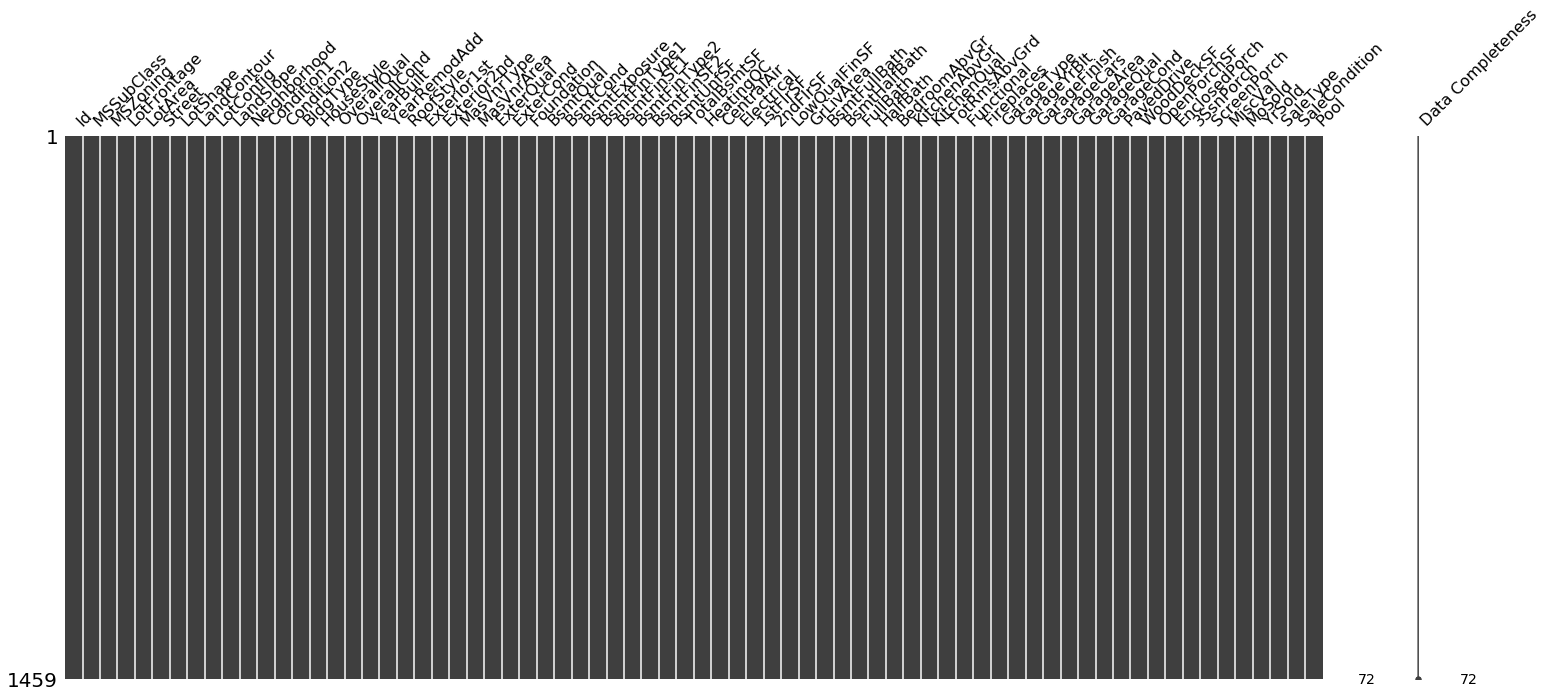

In [65]:
ms.matrix(t_data,labels=True)

In [66]:
for i in ['Utilities','RoofMatl','Heating']:
    y.remove(i)

In [67]:
for i in y:
    t_data = oneHotEnc(i,t_data)

In [68]:
print(list(set(data.columns) - set(t_data.columns)))

['Exterior1st_ImStucc', 'HouseStyle_2.5Fin', 'SalePrice', 'Exterior2nd_Other', 'GarageQual_Fa', 'Exterior1st_Stone', 'Electrical_Mix']


In [69]:
print(list(set(t_data.columns) - set(data.columns)))

['Condition2_PosN', 'Condition2_Norm', 'Condition2_Feedr', 'Street_Pave', 'Condition2_PosA']


In [70]:
# to add into t_data
a = ['GarageQual_Fa', 'Exterior1st_ImStucc', 'HouseStyle_2.5Fin', 'Electrical_Mix', 'Exterior2nd_Other', 'SalePrice', 'Exterior1st_Stone']
for i in a:
    t_data[i] = 0

In [71]:
# to add into data
a = ['Street_Pave', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_Feedr', 'Condition2_PosN']
for i in a:
    data[i] = 0

## Training the model with the whole dataset

In [72]:
v = list(data.columns)
v.remove('SalePrice')
X = data[v]
y = data['SalePrice']

lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
predict1 = lm.predict(t_data.drop('SalePrice',axis=1))
predict2 = model.predict(t_data.drop('SalePrice',axis=1))

In [75]:
predict1

array([187680.4616481 , 193858.85757888, 153926.63322554, ...,
       217873.14840382, 103641.25618538, 218470.94582226])

In [76]:
result1 = pd.DataFrame({'Id':t_data['Id'],'SalePrice':predict1})
result2 = pd.DataFrame({'Id':t_data['Id'],'SalePrice':predict2})

In [77]:
result1.to_csv('Sub1.csv',index=False)
result2.to_csv('Sub2.csv',index=False)